In [10]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

t, r, k, a1, a2, m12, m21 = symbols("t, r, k, a1, a2, m12, m21")
x = Function("x")
y = Function("y")

#Differential Equation 01, including:
# r = positive growth rate
# k1, k2 = Carrying Capacity
# a1 = percentage decrease due to human induced Allee Effects in patch 1
# a2 = percentage decrease due to environmental Allee Effects in patch 2
# m12 = Migration from Patch 1 to 2
Patch_1 = Eq(diff(x(t), t), r * ((x(t)/a1) - 1) * ((1 - (x(t)/k)) * x(t)) - (m12 * x(t))+ (m21*y(t)))

Patch_2 = Eq(diff(y(t), t), r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) + (m12 * x(t))- (m21*y(t)))


solution= dsolve([Patch_1, Patch_2], [x(t), y(t)])
solution


[Eq(x(t), Piecewise((C1*Piecewise((-m12/2 + m21/2 + sqrt(4*m12*m21 + (-m12 + m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 + m21/2 + r - sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), (m21, True))*exp(t*(-m12/2 - m21/2 - r + sqrt(4*m12*m21 + (-m12 + m21)**2)/2)) + C2*Piecewise((-m12/2 + m21/2 - sqrt(4*m12*m21 + (-m12 + m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 + m21/2 + r + sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), (m21, True))*exp(t*(-m12/2 - m21/2 - r - sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), Ne(m12**2 + 2*m12*m21 + m21**2, 0)), (C1*exp(t*(-m12/2 - m21/2 - r + sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), Eq(m12, 0) & Eq(m21, 0) & Eq(m12 + r, m21 + r)), ((C1*Piecewise((-m12/2 + m21/2 + sqrt(4*m12*m21 + (-m12 + m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 + m21/2 + r - sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), (m21, True)) + C2*(t*Piecewise((-m12/2 + m21/2 + sqrt(4*m12*m21 + (-m12 + m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 + m21/2 + r - sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), (m21, True)) + Piecewise((1, Eq(m

In [11]:
#Two Patch Coupled System of ODEs (symmetric migration)
DS1 = r * ((x(t)/a1) - 1) * (1 - (x(t)/k)) * x(t) - m12 * x(t) + m21 * y(t)
DS2 = r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) + m12 * x(t) - m21 * y(t)

#Finding the Equilibrium Values
Equilibrium= nonlinsolve([DS1,DS2], [x(t), y(t)])
display(Equilibrium)

eq_list = list(Equilibrium)
print(eq_list)


# This code only finds the 0,0 equlibrium, which is trivial

FiniteSet((0, 0))

[(0, 0)]


In [32]:
#Finding the Nullcline Polynomial

from sympy import *
y_exp= (r * ((x(t)/a1) - 1) * (1 - (x(t)/k)) * x(t) - m12 * x(t))/(-m21)
exp = r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) + m12 * x(t) - m21 * y(t)
res_exp = exp.subs(y(t), y_exp) 

#Simplifying the expression
res_exp_1 = simplify(res_exp)
display(res_exp)
display(res_exp_1)



r*(-1 + x(t)/a1)*(1 - x(t)/k)*x(t) - r*(-1 - (-m12*x(t) + r*(-1 + x(t)/a1)*(1 - x(t)/k)*x(t))/(a2*m21))*(1 + (-m12*x(t) + r*(-1 + x(t)/a1)*(1 - x(t)/k)*x(t))/(k*m21))*(-m12*x(t) + r*(-1 + x(t)/a1)*(1 - x(t)/k)*x(t))/m21

-r*(a1**2*a2*k**3*m21**3*(a1 - x(t))*(k - x(t)) + (a1*k*m12 + r*(a1 - x(t))*(k - x(t)))*(-a1*k**2*m21 + a1*k*m12*x(t) + r*(a1 - x(t))*(k - x(t))*x(t))*(-a1*a2*k*m21 + a1*k*m12*x(t) + r*(a1 - x(t))*(k - x(t))*x(t)))*x(t)/(a1**3*a2*k**4*m21**3)

In [37]:
#Finding the Zeros of the Nullcline Polynomial (in order to find equalibrium points)

#expand
exp_simp = expand(res_exp) #expanding into polynomial form so it fits into np.roots
display(exp_simp)


-m12*r*x(t)/m21 - r*x(t) - r**2*x(t)/m21 + m12**2*r*x(t)**2/(k*m21**2) + 2*m12*r**2*x(t)**2/(k*m21**2) + r*x(t)**2/k + r**2*x(t)**2/(k*m21) + r**3*x(t)**2/(k*m21**2) - 2*m12*r**2*x(t)**3/(k**2*m21**2) - 2*r**3*x(t)**3/(k**2*m21**2) + r**3*x(t)**4/(k**3*m21**2) + m12**2*r*x(t)**2/(a2*m21**2) + 2*m12*r**2*x(t)**2/(a2*m21**2) + r**3*x(t)**2/(a2*m21**2) - m12**3*r*x(t)**3/(a2*k*m21**3) - 3*m12**2*r**2*x(t)**3/(a2*k*m21**3) - 2*m12*r**2*x(t)**3/(a2*k*m21**2) - 3*m12*r**3*x(t)**3/(a2*k*m21**3) - 2*r**3*x(t)**3/(a2*k*m21**2) - r**4*x(t)**3/(a2*k*m21**3) + 3*m12**2*r**2*x(t)**4/(a2*k**2*m21**3) + 6*m12*r**3*x(t)**4/(a2*k**2*m21**3) + r**3*x(t)**4/(a2*k**2*m21**2) + 3*r**4*x(t)**4/(a2*k**2*m21**3) - 3*m12*r**3*x(t)**5/(a2*k**3*m21**3) - 3*r**4*x(t)**5/(a2*k**3*m21**3) + r**4*x(t)**6/(a2*k**4*m21**3) + r*x(t)**2/a1 + r**2*x(t)**2/(a1*m21) - 2*m12*r**2*x(t)**3/(a1*k*m21**2) - r*x(t)**3/(a1*k) - r**2*x(t)**3/(a1*k*m21) - 2*r**3*x(t)**3/(a1*k*m21**2) + 2*m12*r**2*x(t)**4/(a1*k**2*m21**2) + 4*r**3*x

In [41]:
#find the roots

#solutions = solve(exp_simp)

In [6]:
#Finding the Jacobian 
Jacobian = Matrix(
    [
    [diff(DS1, x(t)), diff(DS1, y(t))], 
    [diff(DS2, x(t)), diff(DS2, y(t))]
    ])
Jacobian


Matrix([
[-m12 - r*(-1 + x(t)/a1)*(1 - x(t)/k) + r*(-1 + x(t)/a1)*x(t)/k - r*(1 - x(t)/k)*x(t)/a1,                                                                                     m21],
[                                                                                    m12, -m21 - r*(-1 + y(t)/a2)*(1 - y(t)/k) + r*(-1 + y(t)/a2)*y(t)/k - r*(1 - y(t)/k)*y(t)/a2]])

In [108]:
#Jacobian matrix with (0,0) substituted in
Jac_1 = simplify(Jacobian.subs({x(t) : eq_list[0][0], y(t) : eq_list[0][1]}))
Jac_1

Matrix([
[-m12 - r,  0],
[     m12, -r]])

In [109]:
#Caculating the Jacobian for each of the equilibrium values. 
for i in eq_list: 
    Jac = simplify(Jacobian.subs({x(t) : i[0], y(t) : i[1]}))
    display(Jac)
    

Matrix([
[-m12 - r,  0],
[     m12, -r]])

Matrix([
[-m12 - r,           0],
[     m12, -a2*r/k + r]])

Matrix([
[-m12 - r,             0],
[     m12, r*(a2 - k)/a2]])

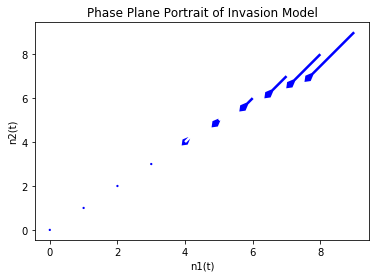

In [58]:
#Creating the Phase Plane Plots, nondimensionalized system

from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np
nx, ny = 1, 1  #increments
x = np.arange(0, 10, nx) #domain
y = np.arange(0, 10, ny) #range
X, Y = np.meshgrid(x, y)

#Example Values for Phase Plane Plots

#Case 1 - Phase plane plots for m12=m21


dx = ((x/0.5) - 1) * (1 - x) * x + 0.5* (y-x)
dy = ((y/0.5) - 1) * (1 - y) * y + 0.5 * (x-y)


plot1 = plt.figure()
plt.quiver(x, y, dx, dy, color='blue', headlength=2)
plt.title('Phase Plane Portrait of Invasion Model')
plt.ylabel('n2(t)')
plt.xlabel('n1(t)')
plt.show(plot1)


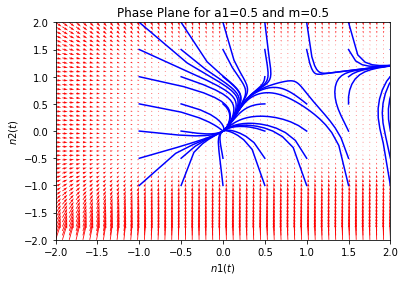

In [68]:
#Phase Plane Portraits 


def f(Y, t):
    x, y = Y
    return [((x/3) - 1) * (1 - x) * x + 0.4* (y-x), ((y/0.5) - 1) * (1 - y) * y + 0.5 * (x-y)]

x1 = np.linspace(-2.0, 2.0, 50)
y1 = np.linspace(-2.0, 2.0, 50)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$n1(t)$')
plt.ylabel('$n2(t)$')
plt.title('Phase Plane for a1=0.5 and m=0.5')


from scipy.integrate import odeint
l = [-1.0,-0.5,0,0.5, 1, 1.5, 2.0]
for y20 in l:
    for y10 in l:
        tspan = np.linspace(0, 50, 200)
        y0 = [y10, y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-') # path
    # plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    # plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 2])
plt.ylim([-2,2])

plt.show()

Text(0, 0.5, 'N2(t)')

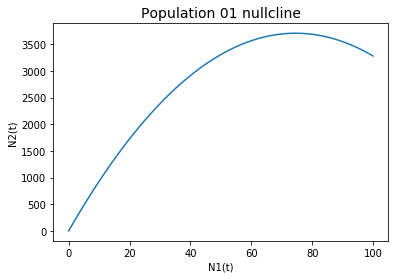

In [184]:
# Nullclines
#Nullclines are when there is no change in the system over time. 
# Intersections of nullclines can show you the fixed points/stability of your system

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import numpy as np


r = int(input('Growth Factor [new individuals/Day] (must be positive)?'))
a1 = int(input('Measure of Allee Effect in the first population, (a1<k)?'))
a2 = int(input('Measure of Allee Effect in the second population (a2<k)?'))
k = int(input('Carrying Capacity (k> a1,a2)?'))
m12 = float(input('Migration rate from Patch 1 to Patch 2 (proportion))?'))

def f1(x):
    return -r * ((x/a1) - 1) * ((1 - (x/k)) * x) - (m12 * x)

x1 = np.linspace(0, 100, 100)
y1 = f1(x)

fig, ax = plt.subplots()
ax.plot(x1, y1, label='Function')
ax.set_title('Population 01 nullcline', size=14)
plt.xlabel("N1(t)")
plt.ylabel("N2(t)")

#yay